# <center> Rooftop Solar Panel Detection : Using Deep Learning

<center> <img src = "https://miro.medium.com/v2/resize:fit:828/format:webp/1*HAdFFhXAN_KYTT9eopEpvg.png" width= 40%>

## **Introduction to the problem**:

**Why should solar panels be detected?**

The detection of solar panels through imagery-based algorithms has become increasingly crucial due to the significant growth of solar photovoltaic (PV) systems in the energy market. As solar energy continues to establish itself as a major player in the renewable energy landscape, there is a rising demand for detailed data on distributed rooftop solar PV installations. Various stakeholders, including solar power providers, customers, urban planners, grid system operators, and energy policy makers, stand to benefit significantly from the development of accurate and efficient solar panel detection algorithms.

One primary motivation for advancing solar panel detection technologies is the need to create granular datasets that capture detailed information about the location and power capacities of solar installations. This data is essential for optimizing energy production, managing grid systems, and informing urban planning decisions. By accurately identifying and cataloging solar panels, these algorithms contribute to a better understanding of the spatial distribution of solar energy resources, enabling more informed decision-making in the renewable energy sector.

Furthermore, the lack of transparency in information sharing among solar panel installers adds to the importance of robust detection mechanisms. Solar panel installers often do not disclose detailed information about their installations, making it challenging to create comprehensive databases. A reliable solar panel detection algorithm can bridge this information gap by autonomously identifying and cataloging solar panels from aerial or satellite imagery.

Despite the growing significance of solar energy, the development of effective solar panel detection algorithms from aerial or satellite images has been relatively limited. Therefore, there is a clear need for increased research and innovation in this area to advance the accuracy and efficiency of solar panel detection, ultimately supporting the sustainable growth and integration of solar power into the broader energy landscape.

#### Global overview on growth of PV Installation

At present, solar energy contributes to just 1% of the global electricity production. However, projections for the future suggest a remarkable 65-fold surge in solar energy output by the year 2050, positioning it as a paramount energy source worldwide. Anticipated to account for 30% of this surge are solar photovoltaic (PV) power systems installed on rooftops. Noteworthy is the accelerating role of solar PV in the United States, where solar energy production witnessed a staggering 39-fold increase, translating to a growth of 75,123 gigawatt-hours between 2008 and 2017. This underscores the escalating significance of solar power in the contemporary electricity generation landscape.

Here's an overview on the global growth -

<center> <img src = "https://www.pv-magazine.com/wp-content/uploads/2022/02/BNEF_Outlook_Photovoltaik_Zubau_2010-2030.jpg" width = 70% >
    
As rooftop solar photovoltaic (PV) systems play an increasingly pivotal role in the energy sector, the demand for precise data on their distribution has surged. The ability to discern solar panels in detail using an image-based recognition algorithm has become crucial for various stakeholders, including solar power providers, consumers, urban planners, grid operators, and policymakers. Unfortunately, the lack of transparency among solar panel installers, who often withhold installation details, has compounded the challenge of obtaining comprehensive data on solar installations.

To address this gap, there is a pressing need for a well-established technique or algorithm capable of detecting solar panels in aerial or satellite imagery. Remarkably, despite the growing significance of solar PV, there has been a noticeable dearth of efforts focused on identifying solar panels in such high-altitude photographs.

The initial step toward developing a robust detection algorithm involves acquiring a labeled dataset of satellite images. This dataset will serve as the foundation for creating an effective algorithm that can accurately recognize and catalog solar panels, offering valuable insights to various stakeholders in the solar energy ecosystem.


## Understanding the Dataset:

##### <center> <b>Here are a few snippets from the dataset - Images containing Solar Panels </b>

<center> <img src = "https://anna-berman.com/images/solarPV-PV.png" width = 75%>

##### <center> <b>Here are a few snippets from the dataset - Images NOT containing Solar Panels</b>
<center> <img src = "https://anna-berman.com/images/solarPV-PVno.png" width = 75%>

Upon close examination of the images, it becomes evident that solar panels often exhibit rectangular shapes characterized by clear angles and well-defined borders. However, the overall composition of pictures featuring solar photovoltaic (PV) installations does not adhere to a uniform structure. Solar panels do not consistently occupy central positions within the images, and the images themselves vary in size and color.

Moreover, the background scenery in both classes of photographs lacks uniformity. Elements such as home swimming pools, pavement, grass, and rooftops are present in images from both categories. It is essential for a model to possess the capability to predict the correct class irrespective of the orientation of each image.

## Importing Necessary Libraries and Modules:

In [37]:
'''IMPORTING THE REQUIRED LIBRARIES AND FUNCTIONS'''


#Data Handling & Linear Algebra

import numpy as np
import pandas as pd

#Visualisation

import matplotlib.pyplot as plt
import matplotlib.image as mplimg
import matplotlib as mpl
from pylab import rcParams
import seaborn as sns

#Data Analysis

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

#Manipulating Data and Model Building

from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import GlobalMaxPooling2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Add
from keras.models import Sequential

In [2]:
!pip install tensorflow

In [38]:
#Defining Data Directories

import os

DIR_TRAIN_IMAGES = r"C:\Users\user\Desktop\training"
DIR_TRAIN_LABELS=r"C:\Users\user\Desktop\labels_training.csv"

## Exploratory Data Analysis and Data Scaling:

In [39]:
pd.read_csv(DIR_TRAIN_LABELS).head()

,id,label
0,0,0
1,1,0
2,2,1
3,3,1
4,4,1


- "id" are names of the image before tif
- "label" has two values:
   - 0: No solar panels in the image
   - 1: Solar panels present in the image

In [42]:
# LOADING THE DATA AND PREPROCESSING IT

def load_data(dir_data, dir_labels):
    '''returns: Array of all the image arrays and its respective labels'''
    
    labels_pd = pd.read_csv(dir_labels)           # Read the CSV file with labels and ids
    ids = labels_pd.id.values                     # Extracting ids from the CSV file
    data = []                                     # Initiating the empty list to store each image as a numpy array
    for identifier in ids:
        fname = os.path.join(dir_data, str(identifier) + '.tif')    # Generating the file name
        image = mplimg.imread(fname)                                # Reading image as a numpy array using matplotlib
        data.append(image)                                          # Appending this array into the empty list and repeat the above cycle
    data = np.array(data)                                           # Convert the data list into a numpy array
    labels = labels_pd.label.values                                 # Extract labels from the CSV file
    return data, labels                                             # Return the array of data and respective labels

In [43]:
# loading train data 

X, y = load_data(DIR_TRAIN_IMAGES, DIR_TRAIN_LABELS)

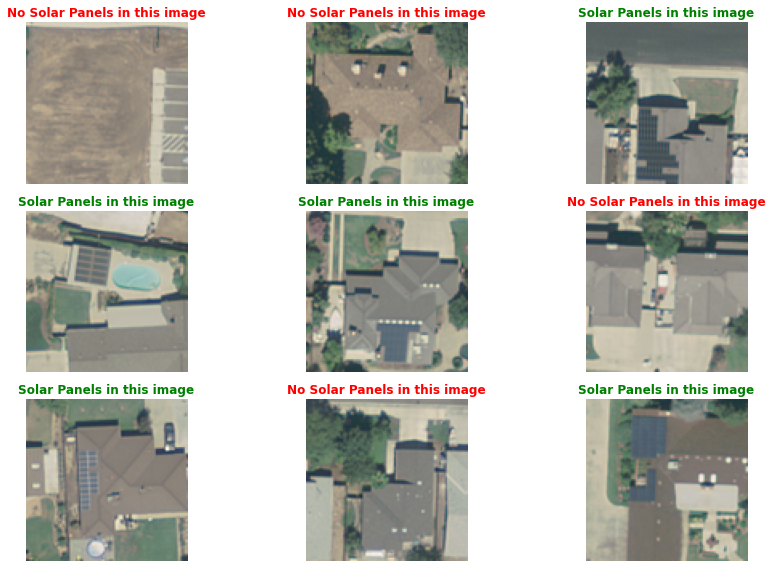

In [58]:
# display the images with and without solar panels
plt.figure(figsize = (13,8))                           # Adjust the figure size
for i in range(9):                                     # For first 9 images in the data
    plt.subplot(3, 3, i+1)                             # Create subplots
    plt.imshow(X[i])                                   # Show the respective image in respective postion
    plt.axis("off")                                    # Not displaying the axis of each image
    if y[i] == 0:                                      # If label is 0
        title = 'No Solar Panels in this image'        # Set this as the title
        plt.title(title, color = 'r', weight = 'bold') # Adding title to each images in the subplot
    else:                                              # Else label is 1
        title = 'Solar Panels in this image'           # Set this as the title
        plt.title(title, color = 'g', weight = 'bold') # Adding title to each images in the subplot
plt.tight_layout()                                     # Automatically adjusts the width and height between images in subplot
plt.show()                                             # Display the subplot

In [59]:
# printing the shape of data

print('X shape:\n', X.shape)

X shape:
 (1500, 101, 101, 3)


This tells us that:
- There are a total of 1500 images in the dataset
- Each image is of the shape: (101 X 101 X 3)

In [60]:
# checking the number of samples

print('Distribution of y: ', np.bincount(y))

Distribution of y:  [995 505]


This tells us that:
- Out of 1500 images:
    - In 995 images 'No Solar panels' were detected
    - In 505 images 'Solar panels' were detected

In [61]:
# scaling pixel values between 0 and 1 by dividing 'X' by the maximum pixel value

X = X / 255.0

## Building and Tuning our Convolusion Neural Network (CNN) Model:

CNNs, or Convolutional Neural Networks, boast a grid-like topology, making them a go-to choice for a range of computer vision tasks such as image classification, picture clustering, and object identification. Unlike traditional neural networks that rely on matrix multiplication, CNNs pivot around the concept of convolution in at least one of their layers. Structured akin to other neural networks, CNNs comprise a sequence of layers, wherein neurons are organized in three dimensions—width, height, and depth. While various CNN architectures exist, their effectiveness in image identification is unparalleled, as they adeptly process pixels in relation to their surroundings.

<img src = "https://miro.medium.com/v2/resize:fit:1400/1*vkQ0hXDaQv57sALXAJquxA.jpeg" width=90% >



<center> Credits : MathWorks

In the convolutional layer, a convolution operation is employed, and the resulting output is forwarded to the subsequent layer. The pool layer, on the other hand, executes a downsampling operation by amalgamating the outputs of neurons from one layer into a singular neuron in the subsequent layer. Following this, the flatten layer reconfigures the feature map into a columnar format. Finally, the full-connection layer calculates the class scores, establishing connections between each neuron in this layer and all the neurons in the preceding layer. This sequential process encapsulates the fundamental operations within a Convolutional Neural Network (CNN).

#### DEEP LEARNING MODEL : CONVOLUTIONAL NEURAL NETWORK

In [67]:
# define CNN
def build_model():
    
    '''Returns a Keras CNN model'''

    # define image dimensions
    
    IMAGE_HEIGHT = 101
    IMAGE_WIDTH = 101
    IMAGE_CHANNELS = 3

    # defining a straightforward sequential neural network
    
    model = Sequential()

    # Layer-1
    #filter is convolutional matrix which is applied across the image = 32 filters
    #kernal size is 3x3 matrix (filter)
    #relu positive kept as it is, negative is taken out
    
    model.add(Conv2D(filters=32,
                     kernel_size=3,
                     activation='relu',
                     input_shape=(IMAGE_HEIGHT,
                                  IMAGE_WIDTH,
                                  IMAGE_CHANNELS)))

    #adding normalizing layer to improve the speed of training
    
    model.add(BatchNormalization())

    # As we move forword in the layers pattern gets more complex, to capture the maximum combinations in subsequent layers
    # layer-2
    
    model.add(Conv2D(filters=64,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    # layer-3
    model.add(Conv2D(filters=128,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    # Pooling layer is to reduce dimentions of feature map by summerizing presence of features
    # max-pool - sends only imp data to next layer - here 2x2 matrix
    
    model.add(MaxPooling2D(pool_size=2))

    # layer-4
    model.add(Conv2D(filters=64,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    # layer-5
    model.add(Conv2D(filters=128,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    # max-pool
    model.add(MaxPooling2D(pool_size=2))

    # layer-6
    model.add(Conv2D(filters=64,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    # layer-7
    model.add(Conv2D(filters=128,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    # gobal-max-pool- performs downsampling by computing the maximum of the height and width dimensions of the input
    # using it as a substitute of Flatten before passing it to the final layer
    
    model.add(GlobalMaxPooling2D())

    # output layer
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


#### Checking the performance of our CNN Model:

In [68]:
# cross-validate CNN model
def cv_performance_assessment(X, y, num_folds, clf, random_seed=1):
    '''
    Cross validated performance assessment

    Input:
        X: training data
        y: training labels
        num_folds: number of folds for cross validation
        clf: classifier to use

    Divide the training data into k folds of training and validation data.
    For each fold the classifier will be trained on the training data and
    tested on the validation data. The classifier prediction scores are
    aggregated and output.
    
    '''

    prediction_scores = np.empty(y.shape[0], dtype='object')

    # establish the num_folds folds
    kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=random_seed)

    for train_index, val_index in kf.split(X, y):
        # extract the training and validation data for this fold
        X_train, X_val = X[train_index], X[val_index]
        y_train = y[train_index]

        # give more weight to minority class based on the target class distribution
        class_weight = {0: 505/1500, 1: 995/1500}

        # train the classifier
        training = clf.fit(x=X_train,
                           y=y_train,
                           class_weight=class_weight,
                           batch_size=32,
                           epochs=10,
                           shuffle=True,
                           verbose=1)

        # test the classifier on the validation data for this fold
        y_val_pred_probs = clf.predict(X_val).reshape((-1, ))

        # save the predictions for this fold
        prediction_scores[val_index] = y_val_pred_probs

    return prediction_scores

In [160]:
# number of subsets of data, where k subsets are used as test set and other k-1 subsets are used for the training purpose
num_folds = 10

# seed value is the previous value number generated by the random function
random_seed = 1

# build_model() function returns the predefined sequential model
cnn = build_model()

# lets look at summary of the model
cnn.summary()

# generate the probabilities (y_pred_prob)
cnn_y_hat_prob = cv_performance_assessment(X, y, num_folds, cnn, random_seed=random_seed)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 99, 99, 32)        896       
                                                                 
 batch_normalization_14 (Ba  (None, 99, 99, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_15 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_15 (Ba  (None, 97, 97, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_16 (Conv2D)          (None, 95, 95, 128)       73856     
                                                                 
 batch_normalization_16 (Ba  (None, 95, 95, 128)      

#### Evaluation Matrics for Classification - Looking at the True Positives, False Negatives, False Positives & True Negatives :

In [161]:
df = pd.read_csv(DIR_TRAIN_LABELS)                                                # Create a data frame of labels 
df["predicted_class"] = [1 if pred >= 0.005 else 0 for pred in cnn_y_hat_prob]    # Add a column to it for predicted class (Adjust the threshold value accordingly)

# Get the values for FN, FP, TP, TN
fn = np.array(df[(df['label'] == 1) & (df['predicted_class'] == 0)]['id'])      # False Negative
fp = np.array(df[(df['label'] == 0) & (df['predicted_class'] == 1)]['id'])      # False Positive
tp = np.array(df[(df['label'] == 1) & (df['predicted_class'] == 1)]['id'])      # True Positive
tn = np.array(df[(df['label'] == 0) & (df['predicted_class'] == 0)]['id'])      # True Negative

In [162]:
def show_images(image_ids, num_images, title, color):
    rcParams['figure.figsize'] = 20, 4
    plt.figure()
    n = 1
    for i in image_ids[0:num_images]:
        plt.subplot(1, num_images, n)
        normalized_image = (X[i] - X[i].min()) / (X[i].max() - X[i].min())
        plt.imshow(normalized_image)
        plt.title('Image id: ' + str(i))
        plt.axis('off')
        n += 1
    plt.suptitle('\n' + title, fontsize=15, color=color, weight='bold')
    plt.show()


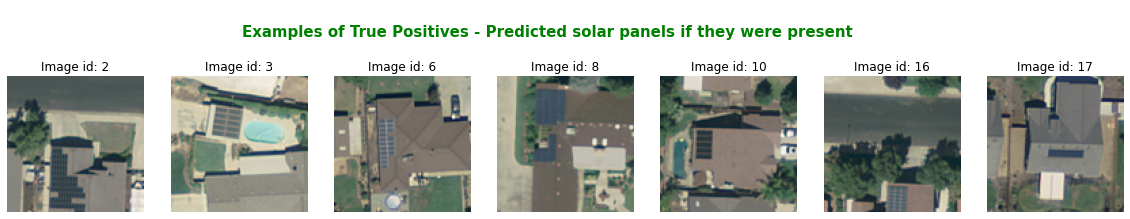

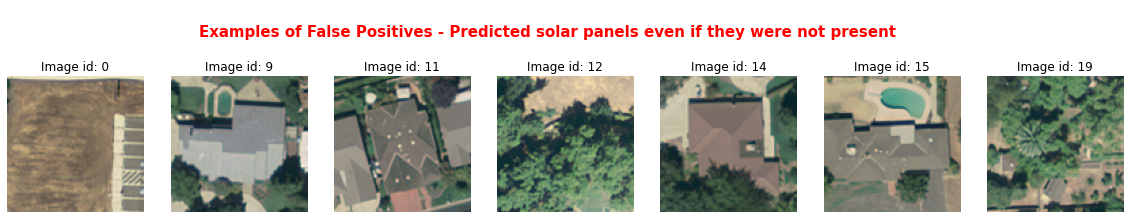

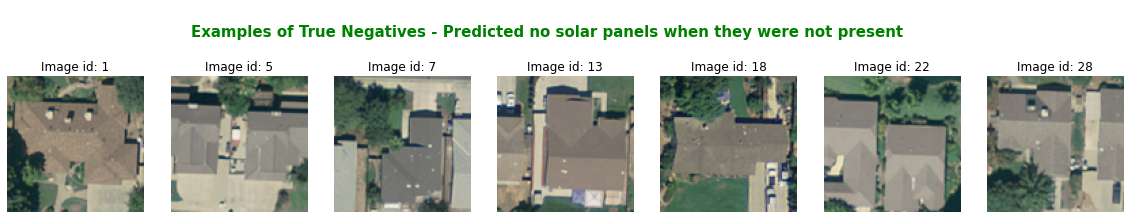

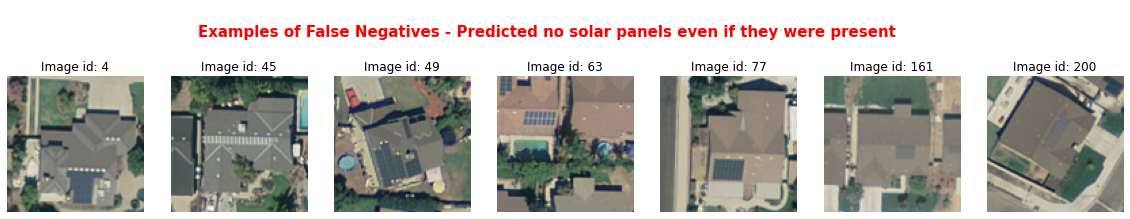

In [163]:
num_images = 7  # number of images to look at
show_images(tp, num_images, 'Examples of True Positives - Predicted solar panels if they were present', 'g')
show_images(fp, num_images, 'Examples of False Positives - Predicted solar panels even if they were not present', 'r')
show_images(tn, num_images, 'Examples of True Negatives - Predicted no solar panels when they were not present', 'g')
show_images(fn, num_images, 'Examples of False Negatives - Predicted no solar panels even if they were present', 'r')

## Model Evaluation and Results:

#### Understanding ROC Curves:

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- True Positive Rate (Recall)
- False Positive Rate

True Positive Rate (TPR) is defined as follows:

<center> <img src = "https://blog.nillsf.com/wp-content/uploads/2020/05/image-38.png" width = 45%>
    
False Positive Rate (FPR) is defined as follows:
    
<center> <img src = "https://blog.nillsf.com/wp-content/uploads/2020/05/image-42.png" width = 40%>
    
An ROC curve plots TPR vs. FPR at different classification thresholds.

Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives.

#### Area Under the ROC Curve (AUC):

AUC, or Area Under the ROC Curve, quantifies the overall performance of a classification model by assessing the entire surface area beneath its Receiver Operating Characteristic (ROC) curve, spanning from 0 to 1. This metric offers a comprehensive evaluation across various classification thresholds. An alternative perspective on AUC is viewing it as the likelihood that the model will correctly rank a randomly selected positive instance higher than a randomly chosen negative instance. The AUC value ranges between 0 and 1, with a model completely erring having an AUC of 0.0, and a model making perfect predictions achieving an AUC of 1.0.

In [164]:
# ROC - AUC
def plot_roc(y_true, y_pred_cnn):
    '''
    Plots ROC curves for the CNN models.
    '''
    plt.figure(figsize=(8, 8))

    # ROC of CNN
    fpr, tpr, _ = roc_curve(y_true, y_pred_cnn, pos_label=1)
    auc = roc_auc_score(y_true, y_pred_cnn)
    legend_string = 'CNN Model - AUC = {:0.3f}'.format(auc)
    plt.plot(fpr, tpr, color='red', label=legend_string)

    # ROC of chance
    plt.plot([0, 1], [0, 1], '--', color='gray', label='Chance - AUC = 0.5')

    # plot aesthetics
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid('on')
    plt.axis('square')
    plt.legend()
    plt.tight_layout()
    plt.title('ROC Curve', fontsize=10)
    pass

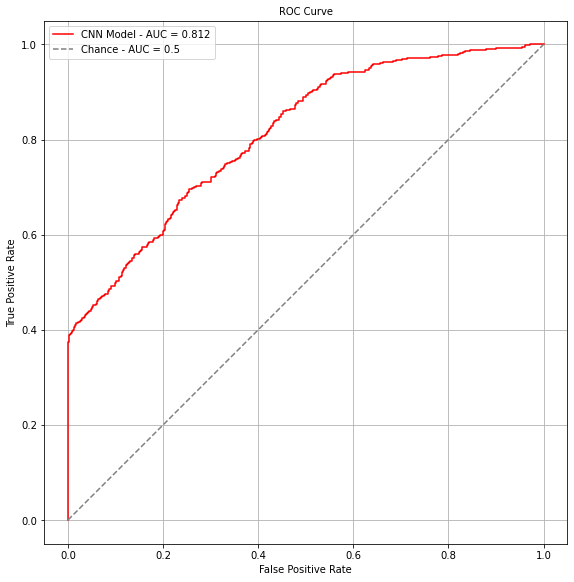

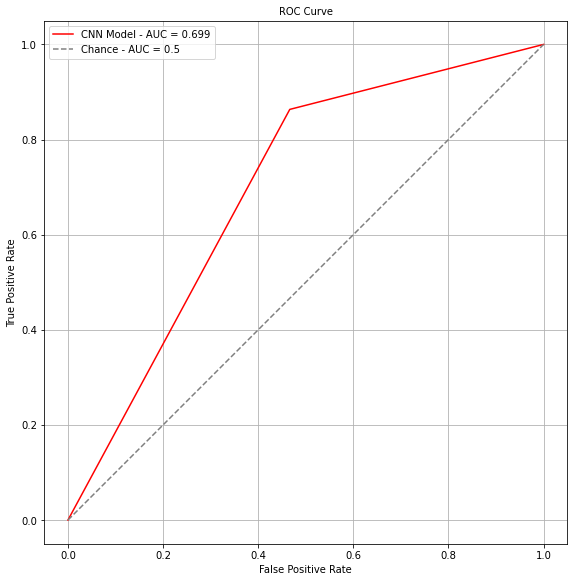

In [165]:
# plot ROC
y_pred = [1 if pred >= 0.005 else 0 for pred in cnn_y_hat_prob]
plot_roc(y,  cnn_y_hat_prob)
plot_roc(y, y_pred)

#### CONFUSION MATRIX:

<center> <img src= "https://miro.medium.com/v2/resize:fit:1218/1*jMs1RmSwnYgR9CsBw-z1dw.png" width = 60%>

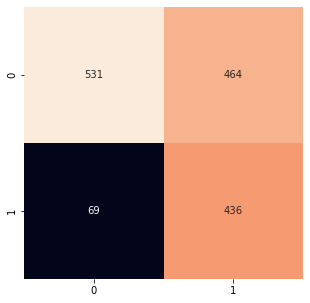

In [166]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y, y_pred), annot = True, cbar = False, fmt='.0f')
plt.show()

## Conclusion of the project:

#### From the ROC curve and AUC:

- AUC measures the area under the ROC curve and is a single scalar value that summarizes the model's ability to discriminate between positive and negative classes.
- AUC values range from 0 to 1. A model with an AUC of 0.5 is equivalent to random guessing, while an AUC of 1.0 indicates perfect discrimination.
- Higher AUC values generally indicate better model performance. A model with an AUC close to 1 is considered excellent in terms of classification. Here we observe the predicted AUC value is 0.812 which is closer to 1. This indicates that the model is near to excellent in terms of classification.
- The shape of the ROC curve itself provides insights into the model's discrimination ability. A curve that is closer to the top-left corner suggests better performance which is the case for this model.
- ROC curves illustrate the trade-off between true positive rate (sensitivity) and false positive rate (1 - specificity) at different classification thresholds. We chose a threshold value of 0.005 which works perfectly for our model.


#### From the Confusion Matrix:

- A confusion matrix provides a tabular representation of the model's performance, breaking down predictions into different categories.
- TP: Instances where the model correctly predicted the positive class.
- TN: Instances where the model correctly predicted the negative class.
- FP: Instances where the model predicted the positive class, but the true label was negative.
- FN: Instances where the model predicted the negative class, but the true label was positive. 
- We predicted a total of 531 TN, 436 TP values. Our aim is to decrease FN and FP values. 

Examining **both AUC and the confusion matrix together** provides a comprehensive assessment of the model's overall performance and areas for improvement. It helps you understand the trade-offs between different evaluation metrics.